# Recherche locale

CSI 4106 - Automne 2024

Marcel Turcotte  
Version: nov. 9, 2024 10h15

# Préambule

## Citation du jour

## Objectifs d’apprentissage

-   **Comprendre** le concept et l’application des algorithmes de
    recherche locale dans les problèmes d’optimisation.
-   **Implémenter** et **analyser** l’algorithme de montée de colline
    (*hill climbing*), en reconnaissant ses limitations comme les maxima
    locaux et les plateaux.
-   **Appliquer** des stratégies efficaces de représentation des états
    dans des problèmes comme les 8-Reines pour améliorer l’efficacité de
    la recherche.
-   **Expliquer** comment le recuit simulé surmonte les optima locaux en
    acceptant probabilistiquement des états pires.
-   **Analyser** l’influence de la température et de la différence
    d’énergie sur la probabilité d’acceptation dans le recuit simulé.
-   **Reconnaître** l’application du recuit simulé dans la résolution de
    problèmes d’optimisation complexes comme le problème du voyageur de
    commerce.

# Introduction

## Contexte

-   L’accent a été mis sur la recherche de **chemins** dans un **espace
    d’états**.
-   Certains problèmes privilégient l’**état final** par rapport au
    chemin.
    -   Conception de circuits intégrés
    -   Ordonnancement d’atelier
    -   Programmation automatique

L’importance du chemin par rapport à l’état final dépend de la nature du
problème. Par exemple, dans un problème d’itinéraire, le chemin est la
pièce d’information cruciale recherchée.

## Problème des 8-Reines

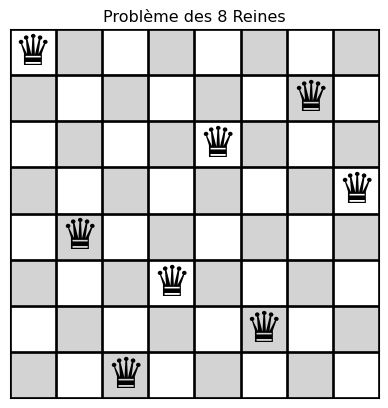

Le **[problème des
8-Reines](https://fr.wikipedia.org/wiki/Problème_des_huit_dames)**
(8-Dames ou *8-Queens*) consiste à placer huit Reines sur un échiquier
de $8 \times 8$ de sorte qu’**aucune reine ne se menace**, c’est-à-dire
qu’aucune reine ne partage la même ligne, colonne ou diagonale.

Pour un échiquier de $8 \times 8$, il existe exactement 92 solutions
distinctes. En éliminant les solutions symmétrique, on se retrouve avec
12 solutions fondamentales. Dans le cas plus général d’un échiquier
$n \times n$, le nombre exact de solutions a été déterminé pour toutes
les valeurs de $n$ allant jusqu’à 27 inclus.

## Définition

> **Note**
>
> (Russell et Norvig 2020, 110)
>
> Les algorithmes de recherche locale opèrent en cherchant d’un état
> initial à des états voisins, sans tenir compte des chemins ni de
> l’ensemble des états atteints.

**Optimise** l’utilisation de la **mémoire** tout en résolvant
efficacement des problèmes dans des **espaces d’états immenses ou
infinis**.

Cet algorithme manque d’une approche systématique et ne garantit pas la
découverte d’une solution optimale.

## Définition du problème

Trouver l’état “meilleur” selon une **fonction objectif**, en localisant
ainsi le **maximum global**.

Ce **problème d’optimisation** est couramment appelé **montée de
colline** (*hill climbing*).

# *Hill Climbing*

## Montée de colline (*Hill Climbing*)

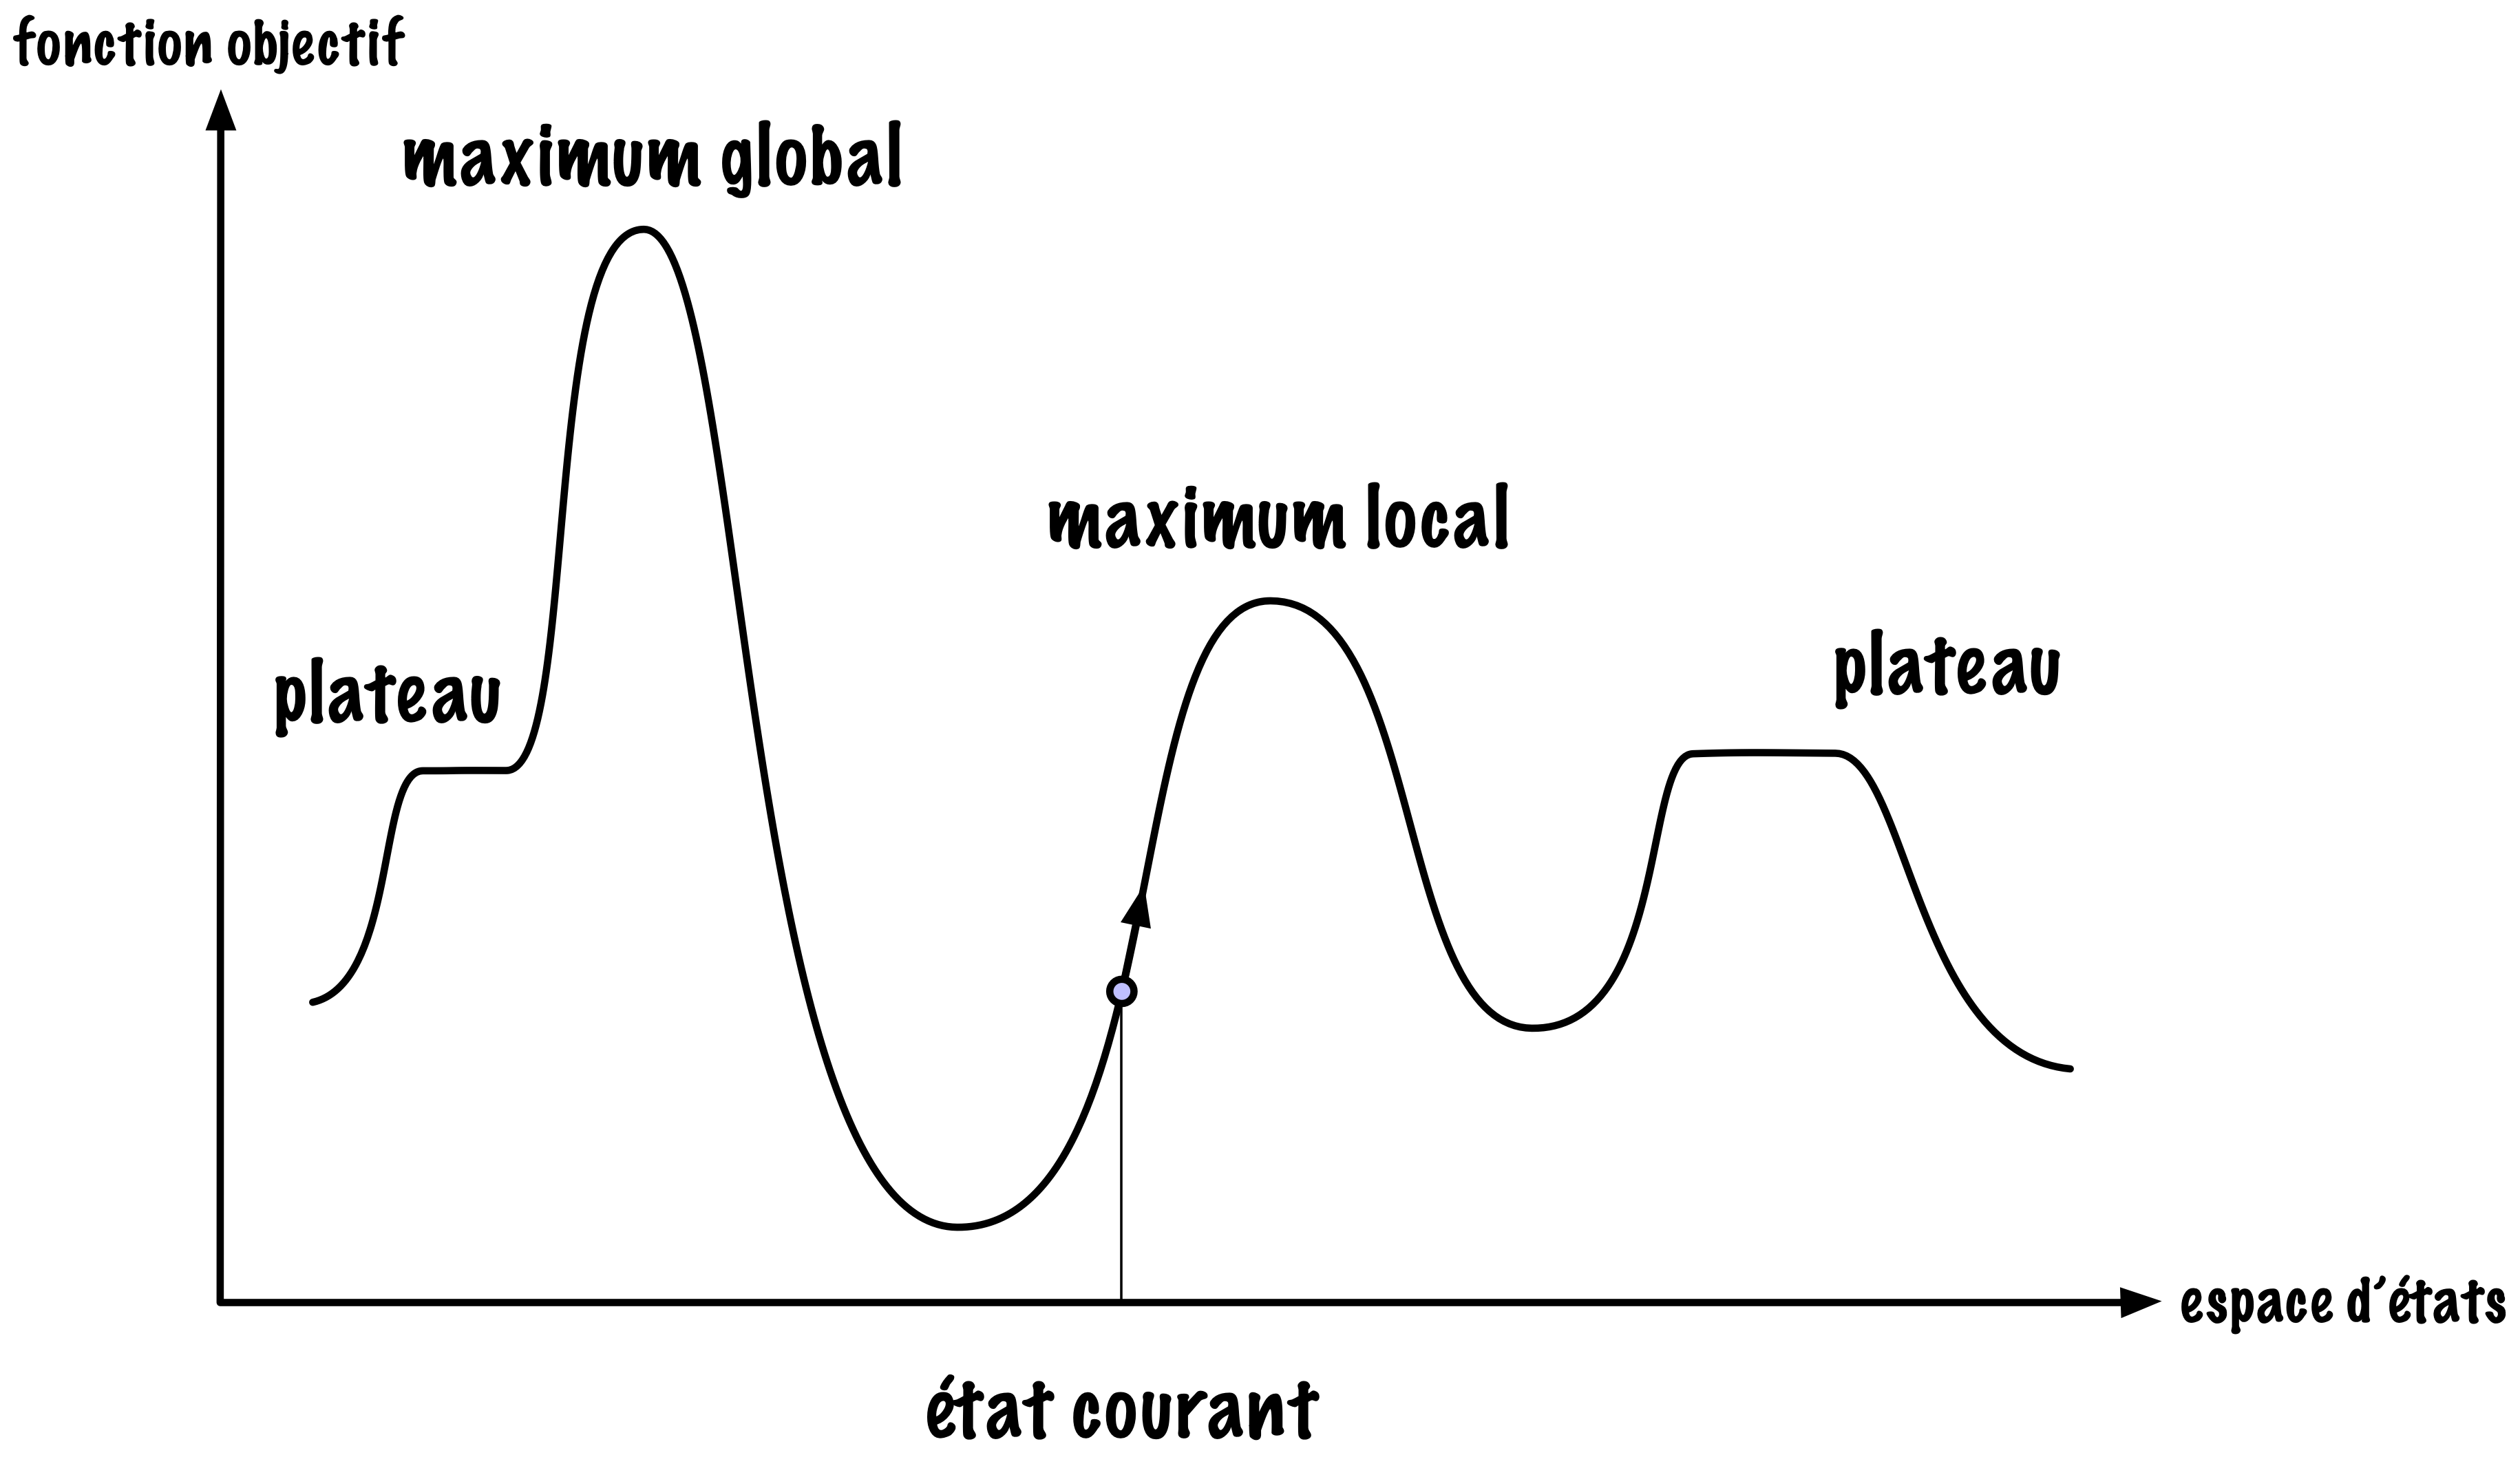

**Attribution**: adapté de Russell et Norvig (2020), page 111.

## *Hill Climbing*

Given as in input a *problem*

-   *current* is the *initial state* of *problem*

-   **while** *not done* **do**

    -   *nighbour* is the highest-valued successor state of *current*
    -   if value(*neighbour*) $\le$ value(*current*) the **return**
        *current*
    -   set *current* to *neighbour*

La montée de colline ne garde pas la trace des états visités
précédemment et n’anticipe pas au-delà de ses voisins immédiats. Elle
conserve un état courant et se déplace dans la direction de l’ascension
la plus abrupte.

En inversant le signe de la fonction objectif, l’algorithme peut être
adapté pour rechercher un minimum local.

## 8-Reines

Comment représenteriez-vous l’**état courant**?

. . .

Pourquoi l’utilisation d’une grille pour représenter l’**état courant**
est-elle sous-optimale?

. . .

Une représentation en grille permet le **placement illégal de reines**
dans la même colonne.

. . .

À la place, nous pouvons représenter l’état comme une liste
($\mathrm{état}$), où chaque élément correspond à la position de la
ligne de la reine dans sa colonne respective.

En d’autres termes, $\mathrm{état}[i]$ est la ligne de la reine dans la
colonne $i$.

## Représentation de l’état

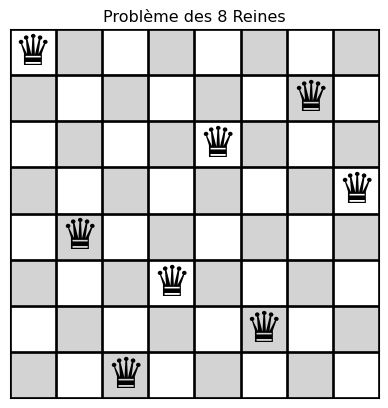

``` python
etat = [0, 4, 7, 5, 2, 6, 1, 3]
```

## `create_initial_state`

In [6]:
import random
random.seed(7)

def create_initial_state(n):

    """Génère un état initial aléatoire avec une reine par colonne."""

    return [random.randint(0, n - 1) for _ in range(n)]

Qu’en **pensez-vous** ?

## `create_initial_state`

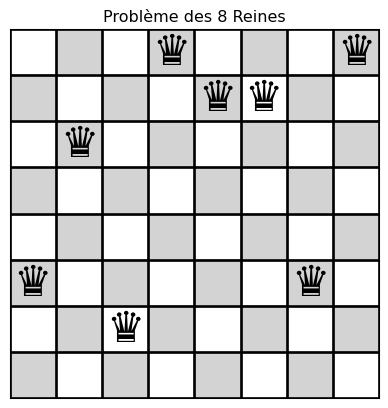

In [8]:
etat 

[5, 2, 6, 0, 1, 1, 5, 0]

Permet deux Reines dans la même ligne? Comment cela peut-il être corrigé
?

## Représentation des 8-Reines

Échiquier $8 \times 8$.

-   **Placement sans contrainte** : $\binom{64}{8} = 4,426,165,368$
    configurations possibles, représentant la sélection de 8 cases parmi
    64.

-   **Contrainte de colonne** : Utilisez une liste de longueur 8, chaque
    entrée indiquant la ligne d’une reine dans sa colonne respective, ce
    qui donne $8^8 = 16,777,216$ configurations.

-   **Contraintes de ligne et de colonne** : Modélisez les états du
    plateau comme des permutations des indices de ligne des 8 reines,
    réduisant les configurations à $8! = 40,320$.

Cela souligne l’importance de choisir une bonne représentation.

## `create_initial_state`

In [9]:
import random
random.seed(7)

def create_initial_state(n):

    """Génère une permutation des nombres de 0 à n-1 comme état initial."""

    etat = list(range(n))
    random.shuffle(etat)

    return etat

## `create_initial_state`

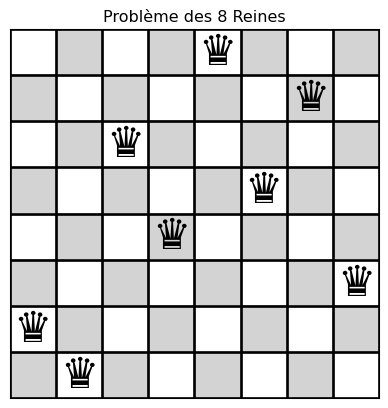

In [11]:
etat 

[6, 7, 2, 4, 0, 3, 1, 5]

## `calculate_conflicts`

In [12]:
def calculate_conflicts(etat):

    n = len(etat)
    conflits = 0

    for col_i in range(n):
        for col_j in range(col_i + 1, n):
            row_i = etat[col_i]
            row_j = etat[col_j]
            if row_i == row_j:                 # même ligne
                conflits += 1
            if col_i - row_i == col_j - row_j: # même diagonale
                conflits += 1
            if col_i + row_i == col_j + row_j: # même antidiagonale
                conflits += 1

    return conflits

## `calculate_conflicts`

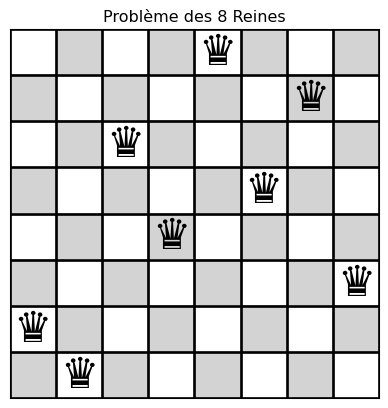

    5

## `get_neighbors_rn`

In [15]:
def get_neighbors_rn(etat):
    """Génère des états voisins en déplaçant une reine à la fois vers une nouvelle ligne."""
    voisins = []
    n = len(etat)

    for col in range(n):
        for row in range(n):
            if (etat[col] != row):
              nouvel_etat = etat[:]  # copie de l'état
              nouvel_etat[col] = row
              voisins.append(nouvel_etat)

    return voisins

Russell et Norvig (2020), $8 \times 7 = 56$ voisins

## `get_neighbors_rn`

In [16]:
initial_state_8 = create_initial_state(8)
print(initial_state_8)
for s in get_neighbors_rn(initial_state_8):
  print(f"{s} -> # of conflicts = {calculate_conflicts(s)}")

[3, 2, 7, 1, 6, 0, 4, 5]
[0, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[1, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 6
[2, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 6
[4, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 6
[5, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 7
[6, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[7, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 0, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 1, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 3, 7, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 4, 7, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 5, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 6, 7, 1, 6, 0, 4, 5] -> # of conflicts = 6
[3, 7, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 2, 0, 1, 6, 0, 4, 5] -> # of conflicts = 9
[3, 2, 1, 1, 6, 0, 4, 5] -> # of conflicts = 8
[3, 2, 2, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 2, 3, 1, 6, 0, 4, 5] -> # of conflicts = 8
[3, 2, 4, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 2, 5, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 2, 6, 1, 6, 0, 4, 5] -> # of co

## `get_neighbors`

In [17]:
def get_neighbors(etat):
    """Génère des états voisins en échangeant deux lignes."""
    voisins = []
    n = len(etat)

    for i in range(n):
        for j in range(i + 1, n):
            nouvel_etat = etat[:]
            nouvel_etat[i], nouvel_etat[j] = nouvel_etat[j], nouvel_etat[i]
            voisins.append(nouvel_etat)

    return voisins

$\frac{8 \times 7}{2} = 28$ voisins

## `get_neighbors`

In [18]:
print(initial_state_8)
for s in get_neighbors(initial_state_8):
  print(f"{s} -> # of conflicts = {calculate_conflicts(s)}")

[3, 2, 7, 1, 6, 0, 4, 5]
[2, 3, 7, 1, 6, 0, 4, 5] -> # of conflicts = 8
[7, 2, 3, 1, 6, 0, 4, 5] -> # of conflicts = 6
[1, 2, 7, 3, 6, 0, 4, 5] -> # of conflicts = 3
[6, 2, 7, 1, 3, 0, 4, 5] -> # of conflicts = 3
[0, 2, 7, 1, 6, 3, 4, 5] -> # of conflicts = 7
[4, 2, 7, 1, 6, 0, 3, 5] -> # of conflicts = 3
[5, 2, 7, 1, 6, 0, 4, 3] -> # of conflicts = 6
[3, 7, 2, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 1, 7, 2, 6, 0, 4, 5] -> # of conflicts = 3
[3, 6, 7, 1, 2, 0, 4, 5] -> # of conflicts = 7
[3, 0, 7, 1, 6, 2, 4, 5] -> # of conflicts = 4
[3, 4, 7, 1, 6, 0, 2, 5] -> # of conflicts = 3
[3, 5, 7, 1, 6, 0, 4, 2] -> # of conflicts = 4
[3, 2, 1, 7, 6, 0, 4, 5] -> # of conflicts = 7
[3, 2, 6, 1, 7, 0, 4, 5] -> # of conflicts = 5
[3, 2, 0, 1, 6, 7, 4, 5] -> # of conflicts = 10
[3, 2, 4, 1, 6, 0, 7, 5] -> # of conflicts = 4
[3, 2, 5, 1, 6, 0, 4, 7] -> # of conflicts = 4
[3, 2, 7, 6, 1, 0, 4, 5] -> # of conflicts = 5
[3, 2, 7, 0, 6, 1, 4, 5] -> # of conflicts = 5
[3, 2, 7, 4, 6, 0, 1, 5] -> # of c

## `hill_climbing`

In [19]:
import numpy as np

def hill_climbing(etat_courant):

    conflits_courants = calculate_conflicts(etat_courant)

    while True:

        if conflits_courants == 0:
          return etat_courant

        voisins = get_neighbors(etat_courant)

        conflits = [calculate_conflicts(voisin) for voisin in voisins]

        if (min(conflits)) > conflits_courants:
          return None # Aucune amélioration trouvée, bloqué dans un minimum local

        arg_best = np.argmin(conflits)
        etat_courant = voisins[arg_best]
        conflits_courants = conflits[arg_best]

Le programme ci-haut présente un défi majeur. Quel est-il exactement ?

Il est important de noter que, dans ce contexte particulier, le problème
est défini de manière à ce que la solution recherchée soit exempte de
tout conflit. Cependant, dans certains problèmes d’optimisation, la
valeur minimale de la fonction objective n’est pas préalablement
déterminée.

Le principal problème est que l’algorithme risque d’entrer dans une
boucle infinie si la condition `min(conflits == conflits_courant)` est
satisfaite.

Deux scénarios peuvent se présenter : soit le plateau est suivi d’une
pente ascendante, soit il représente un maximum local. Dans le premier
cas, l’algorithme pourrait potentiellement sortir du plateau, bien que
cela ne soit pas garanti. Pour prévenir les boucles infinies, il serait
judicieux d’implémenter un mécanisme approprié.

## `hill_climbing` (version 2)

In [20]:
MAX_SIDE_MOVES = 100

def hill_climbing(etat_courant):

    conflits_courants = calculate_conflicts(etat_courant)
    mouvements_lateraux = 0

    while True:

        if conflits_courants == 0:
          return etat_courant

        voisins = get_neighbors(etat_courant)

        conflits = [calculate_conflicts(voisin) for voisin in voisins]

        if (min(conflits)) > conflits_courants:
          return None  # Aucune amélioration trouvée, bloqué dans un minimum local

        if (min(conflits)) == conflits_courants:
          mouvements_lateraux += 1  # Plateau

        if mouvements_lateraux > MAX_SIDE_MOVES:
          return None

        arg_best = np.argmin(conflits)
        etat_courant = voisins[arg_best]
        conflits_courants = conflits[arg_best]

## Résoudre

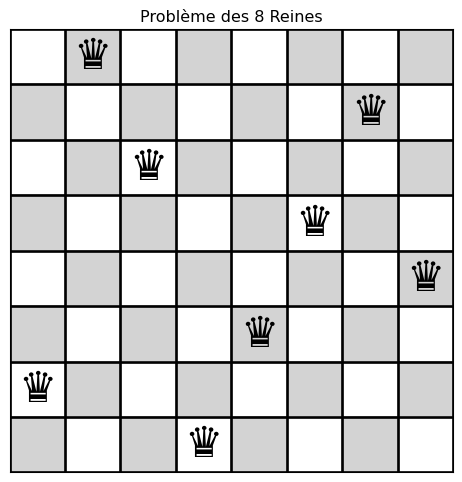

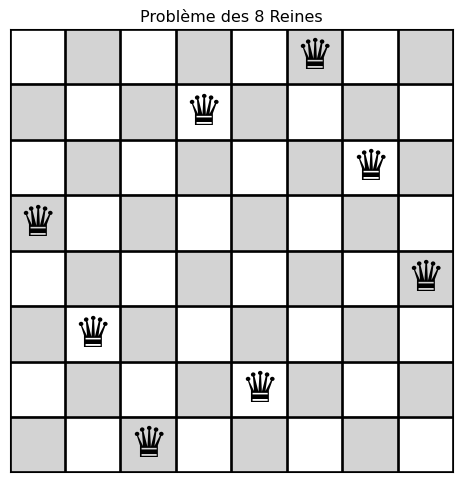

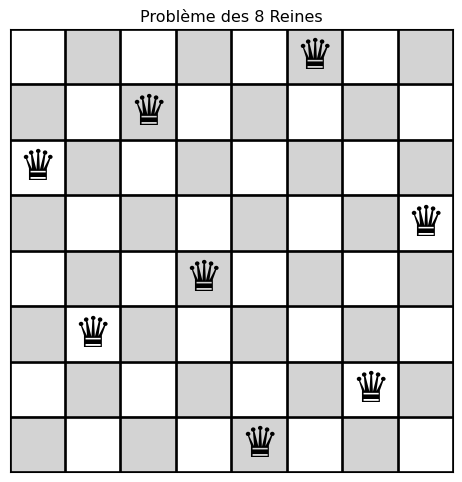

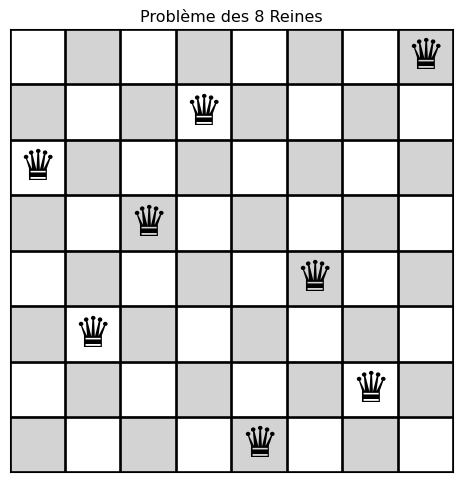

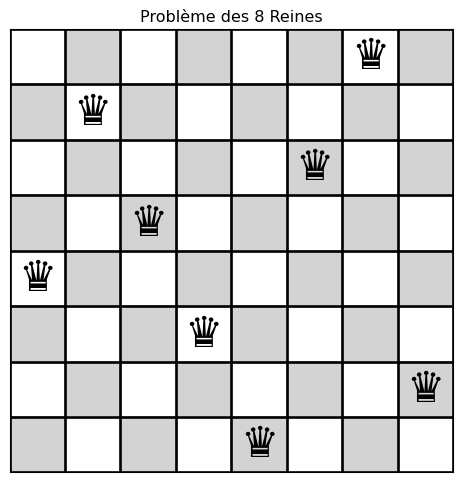

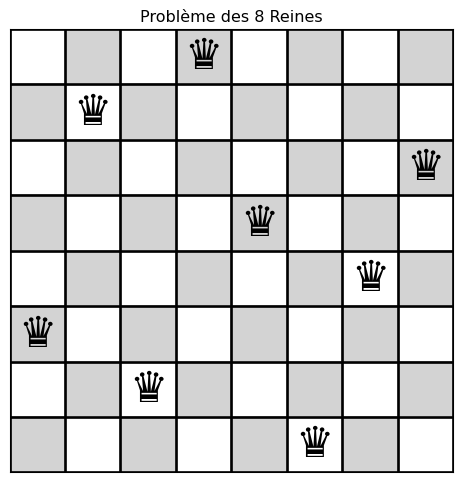

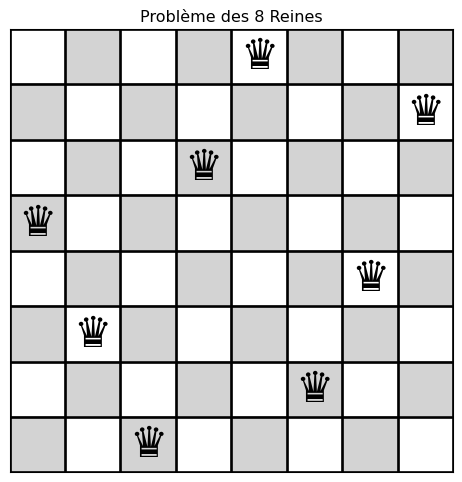

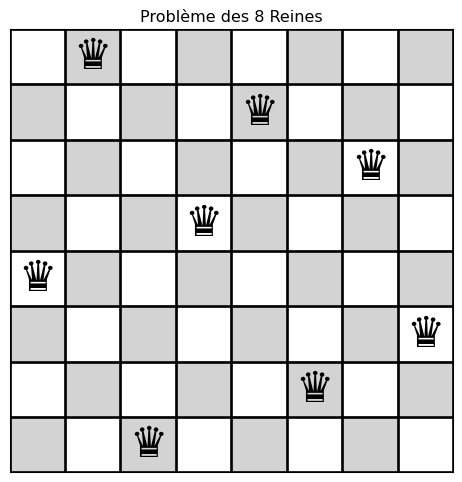

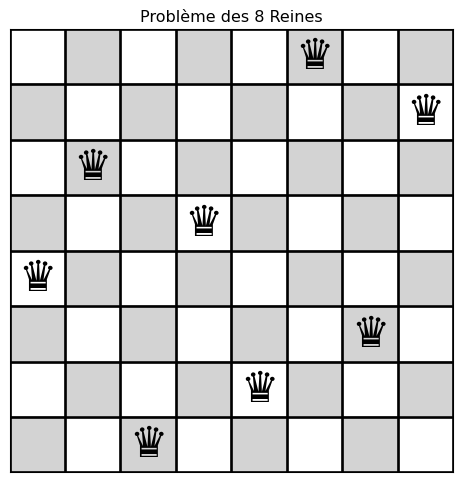

10 essais, nombre de solutions = 9, 0 déjà vues

## Résoudre (2)

1000 essais, nombre de solutions = 704, 92 uniques

## Résoudre 40-Reines

$40! = 8.1591528325 \times 10^{47}$

. . .

10 essais, nombre de solutions = 6, 6 uniques

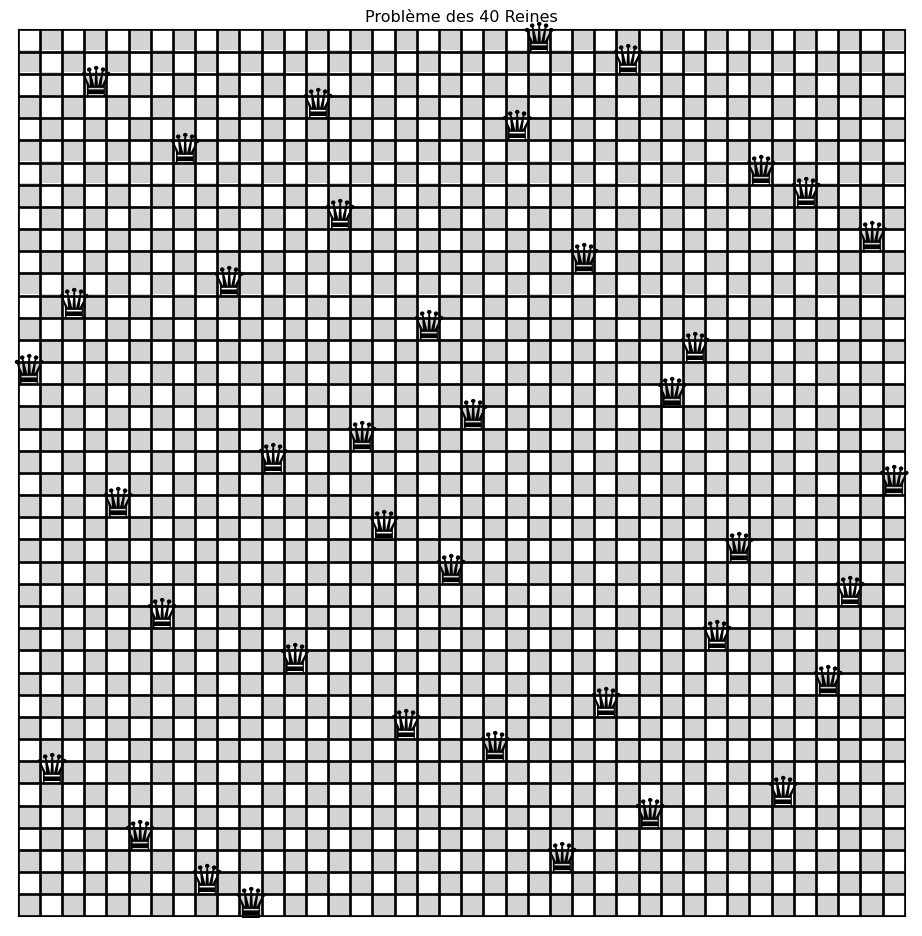

Temps écoulé : 15.7304 secondes

## Itérations et mouvement latéraux

1000 essais, nombre de solutions = 704, 92 uniques

/var/folders/gh/zd7z03rs5dj7q_df5gz5jlmh0000gp/T/ipykernel_5899/3452806143.py:20: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


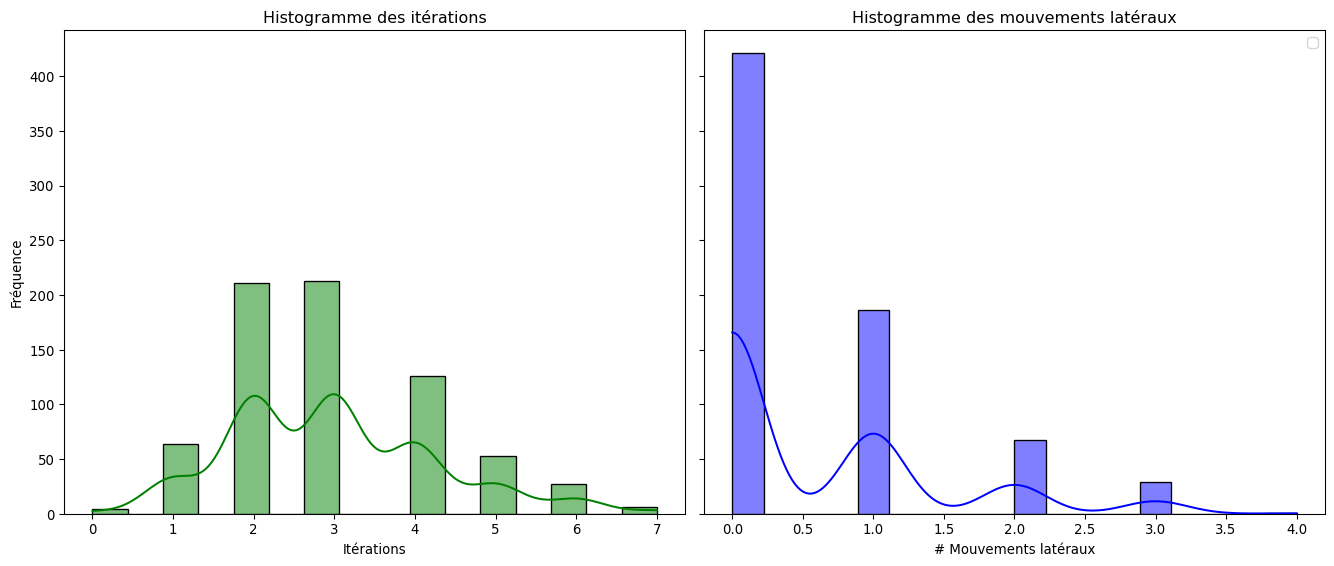

## 20-Reines

1000 essais, nombre de solutions = 566, 566 uniques

/var/folders/gh/zd7z03rs5dj7q_df5gz5jlmh0000gp/T/ipykernel_5899/3452806143.py:20: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


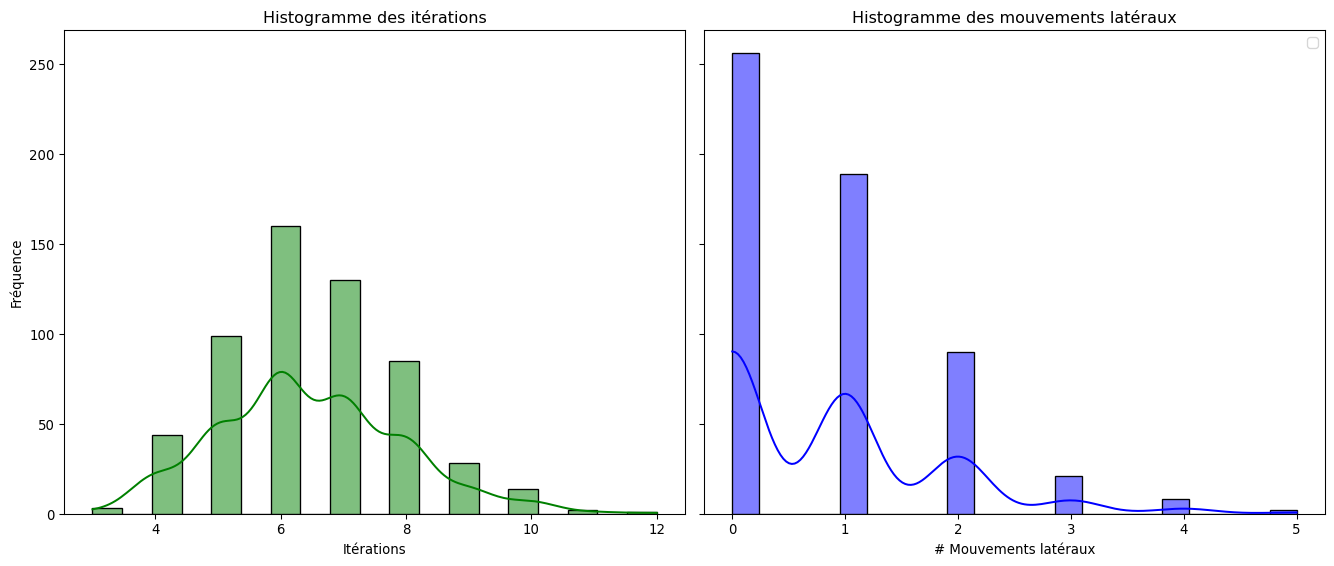

## Russell & Norvig

-   La montée de colline **échoue 86 % du temps**.
    -   Les tentatives réussies nécessitent en moyenne **4 étapes pour
        une solution**.
-   Permettre **100 mouvements latéraux** augmente le taux de réussite
    de 14 % à 94 %.
-   L’espace de recherche contient $8^8 = 16,777,216$ états.
    -   Implémentation de Russell & Norvig

Possède de nombreuses variantes, notamment la montée de colline avec
**redémarrage aléatoire**.

Dans l’implémentation que j’ai proposée, il ne semble pas y avoir de
minimums locaux. Toutefois, cela nécessite une vérification plus
approfondie.

## Échapper à un optimum local

Quels **mécanismes** permettraient à l’algorithme de **montée de
colline** d’échapper à un optimum local, qu’il s’agisse d’un minimum ou
d’un maximum local ?

Il doit accepter de descendre.

Une approche de marche aléatoire, qui ignore la valeur de la fonction
objectif, pourrait théoriquement trouver le maximum global. Cependant,
cette méthode est extrêmement inefficace.

## Remarque

Supposons que le problème d’optimisation soit une **minimisation**, où
l’objectif est de trouver une solution avec le **coût minimum**.

Descente de colline, descente de gradient.

# Recuit simulé

## Définition

Le **recuit simulé** (*simulated annealing*) est un algorithme
d’optimisation inspiré du processus de recuit en métallurgie. Il explore
l’espace de solutions de manière probabiliste en permettant des
**déplacements occasionnels vers le haut**, ce qui aide à **échapper aux
optima locaux**. L’algorithme **réduit progressivement la probabilité
d’accepter des solutions pires** en diminuant un paramètre de
“température”, convergeant ainsi vers une solution optimale ou
quasi-optimale.

## Recuit

> **Note**
>
> (Russell et Norvig 2020, 114)
>
> **En métallurgie**, le **recuit** est le processus de durcissement des
> métaux et du verre en les **chauffant à haute température** et en les
> **refroidissant progressivement**, permettant ainsi au matériau
> d’atteindre un **état cristallin à faible énergie**.

Le solide est chauffé jusqu’à son point de fusion, ce qui rend les
particules distribuées de manière aléatoire.

Ensuite, le matériau est refroidi progressivement, permettant aux
particules de se réorganiser en un état de faible énergie.

## Algorithme

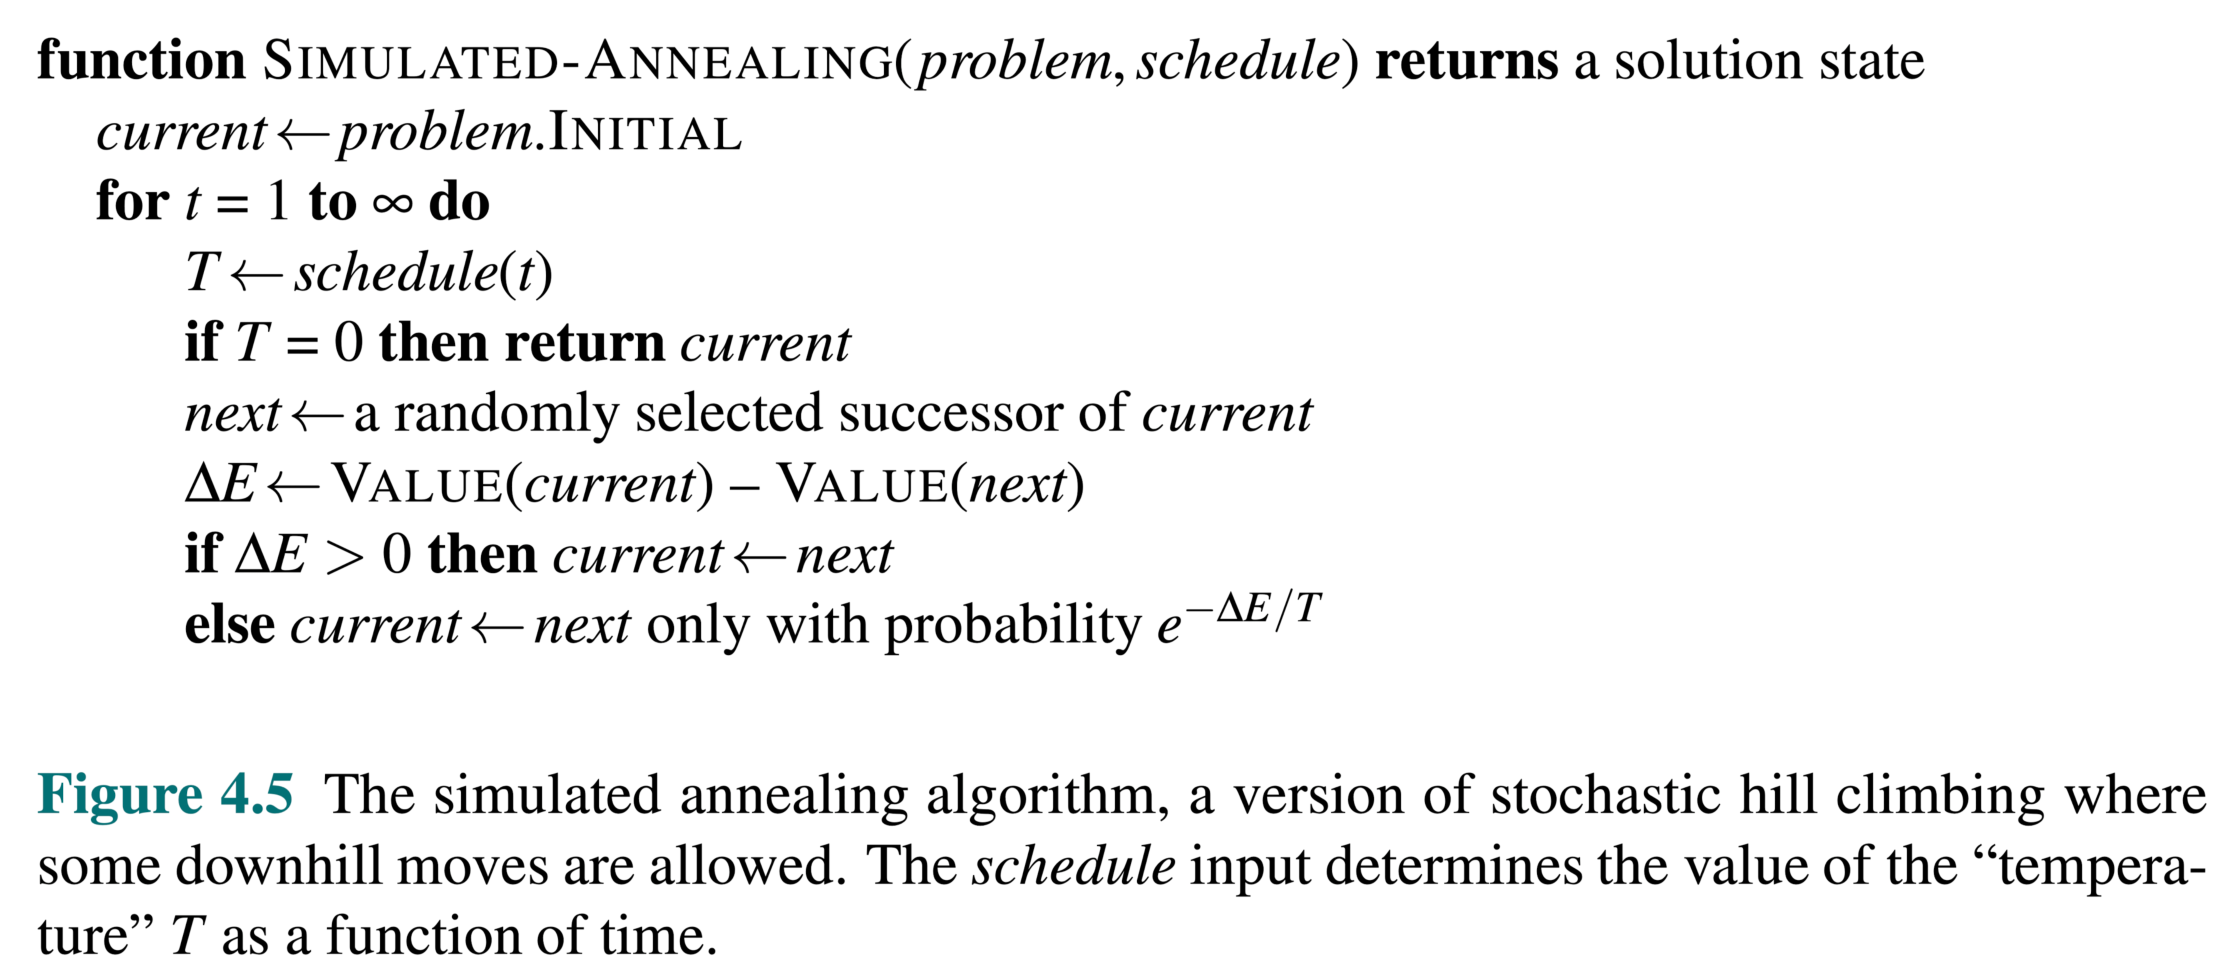

**Attribution** : (Russell et Norvig 2020, 115)

    1.  Cet algorithme ressemble à la montée de colline mais diffère en sélectionnant aléatoirement l’état suivant au lieu de choisir le meilleur mouvement.
    2.  Si le déplacement réduit la valeur de la fonction objectif, il est accepté sans condition.
    3.  Sinon, l’acceptation est probabiliste, en fonction de $\Delta E$ et $T$.

## Variation de $\Delta E$

<>:16: SyntaxWarning:

invalid escape sequence '\D'

<>:16: SyntaxWarning:

invalid escape sequence '\D'

/var/folders/gh/zd7z03rs5dj7q_df5gz5jlmh0000gp/T/ipykernel_5899/2313967801.py:16: SyntaxWarning:

invalid escape sequence '\D'


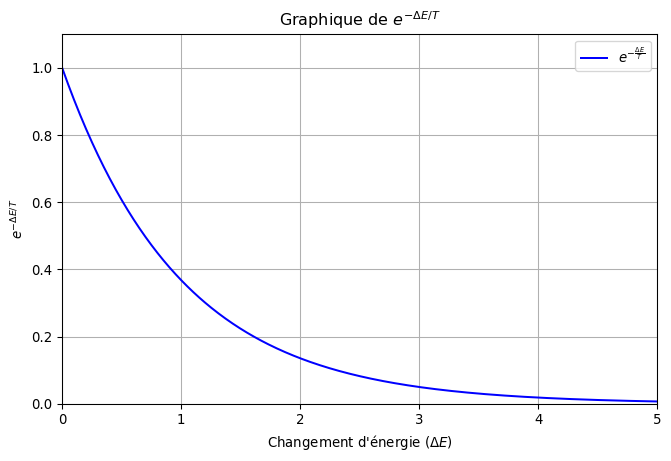

Les mouvements entraînant des **changements négatifs significatifs
(pires)** de la fonction objectif sont **moins susceptibles d’être
acceptés**.

## Variation de la température, $T$

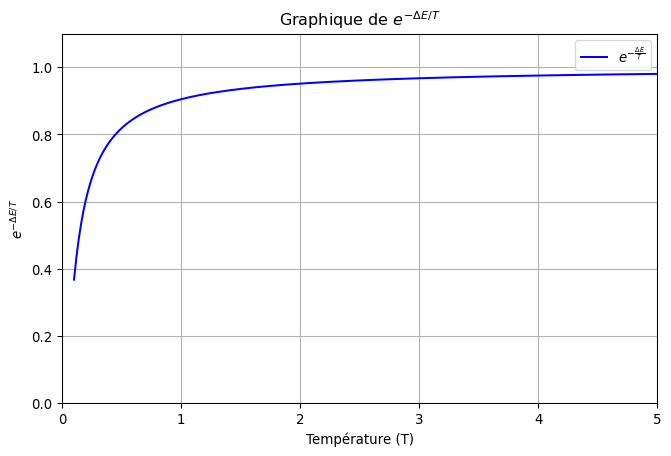

Pour un $\Delta E$ fixé (ici $0.1$), les changements sont plus
susceptibles d’être acceptés lorsque $T$ est élevé, au début de
l’algorithme.

## Variation de la température et de $\Delta E$

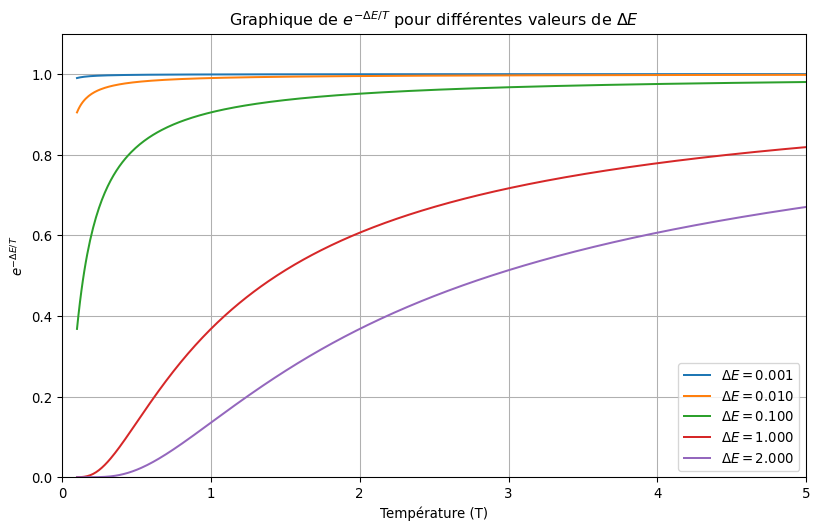

Les mauvais mouvements sont plus susceptibles d’être acceptés au début,
lorsque $T$ est élevé, et moins susceptibles de l’être lorsque $T$
diminue.

## Faire varier la température et $\Delta E$

In [ ]:
import { Inputs, Plot } from "@observablehq/plot"

viewof deltaE = Inputs.range([0.01, 100], {step: 0.01, value: 0.1, label: "ΔE", width: 300})

T_values = Array.from({length: 1000}, (_, i) => (i + 1) * 0.1)

function computeData(deltaE) {
  return T_values.map(T => ({
    T: T,
    value: Math.exp(-deltaE / T)
  }))
}

data = computeData(deltaE)

Plot.plot({
  marks: [
    Plot.line(data, {
      x: "T", 
      y: "value", 
      stroke: "steelblue", 
      strokeWidth: 2
    }),
    Plot.ruleX([0], {stroke: "black"}), // X-axis line
    Plot.ruleY([0], {stroke: "black"})  // Y-axis line
  ]
})

Graphique interactif à l’aide d’**[Observable
JS](https://observablehq.com/plot/)**.

## Théorie

> **Note**
>
> (Russell et Norvig 2020, 114)
>
> Si le calendrier abaisse $T$ à 0 suffisamment lentement, une propriété
> de la distribution de **Boltzmann** (alias **Gibbs**),
> $e^{\frac{\Delta E}{T}}$, est que toute la probabilité se concentre
> sur les maxima globaux, que l’algorithme trouvera avec une probabilité
> tendant vers 1.

## Définition

Le **problème du voyageur de commerce** (*travelling salesman problem*)
(TSP) est un problème d’optimisation classique qui cherche l’itinéraire
le plus court possible pour un voyageur devant visiter un ensemble de
villes, en revenant à la ville d’origine, tout en visitant chaque ville
exactement une fois.

Le défi est de déterminer le chemin le plus efficace, surtout lorsque le
nombre de villes augmente, en raison de l’explosion combinatoire des
itinéraires possibles.

## Comment représenter une solution?

. . .

Nous utiliserons une **liste** dans laquelle chaque élément représente
l’indice d’une ville, et l’ordre des éléments indique la **séquence de
visite des villes**.

## Calcul de la distance total

In [33]:
# Fonction pour calculer la distance totale d'un itinéraire donné

def calculate_total_distance(route, distance_matrix):

    total_distance = 0

    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i], route[i + 1]]

    total_distance += distance_matrix[route[-1], route[0]]  # Retourner au point de départ

    return total_distance

## Voisinage

Comment générer une solution voisine?

## Échanger deux villes

-   **Description** : Sélectionner deux villes au hasard et échanger
    leurs positions.

-   **Avantages** : Simple et efficace pour explorer des solutions
    voisines.

-   **Inconvénients** : Le changement peut être trop minime, ce qui peut
    ralentir la convergence.

## Inverser le segment

-   **Description** : Sélectionner deux indices et inverser le segment
    entre eux.

-   **Avantages** : Plus efficace pour trouver des chemins plus courts
    par rapport aux échanges simples.

-   **Inconvénients** : Peut être coûteux en calcul à mesure que le
    nombre de villes augmente.

## Supprimer & reconnecter

-   **Description** : Supprime trois arêtes de l’itinéraire et
    reconnecte les segments de la meilleure façon possible. Cela peut
    générer jusqu’à 7 itinéraires différents.

-   **Avantages** : Apporte des changements plus importants et peut
    échapper aux optima locaux plus efficacement.

-   **Inconvénients** : Plus complexe et coûteux en calcul à mettre en
    œuvre.

## Mouvement d’insertion

-   **Description** : Sélectionner une ville et la déplacer à une
    position différente dans l’itinéraire.

-   **Avantages** : Offre un équilibre entre petits et grands
    changements, utile pour affiner les solutions.

-   **Inconvénients** : Peut nécessiter plus d’itérations pour converger
    vers une solution optimale.

## Mélanger le sous-ensemble

-   **Description** : Sélectionner un sous-ensemble de villes dans
    l’itinéraire et mélanger leur ordre de manière aléatoire.

-   **Avantages** : Introduit des changements plus importants et peut
    aider à échapper aux minima locaux.

-   **Inconvénients** : Peut conduire à des itinéraires moins efficaces
    si mal géré.

## Générer une solution voisine aléatoire

In [34]:
# Fonction pour générer une solution voisine aléatoire

def get_neighbor(route):

    a, b = np.random.randint(0, len(route), size=2)
    if a > b:
        a, b = b, a

    new_route = route.copy()
    new_route[a:b+1] = new_route[a:b+1][::-1]  # Inverser le segment entre a et b

    return new_route

## Recuit simulé

In [35]:
def simulated_annealing(distance_matrix, initial_temp, cooling_rate, max_iterations):

    num_cities = len(distance_matrix)
    current_route = np.arange(num_cities)
    np.random.shuffle(current_route)

    current_cost = calculate_total_distance(current_route, distance_matrix)
    
    best_route = current_route.copy()
    best_cost = current_cost

    temperature = initial_temp

    for iteration in range(max_iterations):

        neighbor_route = get_neighbor(current_route)
        neighbor_cost = calculate_total_distance(neighbor_route, distance_matrix)
        
        # Accepter le voisin s'il est meilleur, ou avec une probabilité s'il est pire.

        delta_E = neighbor_cost - current_cost

        if neighbor_cost < current_cost or np.random.rand() < np.exp(-(delta_E)/temperature):
            current_route = neighbor_route
            current_cost = neighbor_cost

            if current_cost < best_cost:
                best_route = current_route.copy()
                best_cost = current_cost

        # Refroidir la température
        temperature *= cooling_rate

    return best_route, best_cost, temperatures, costs

## Remarques

-   Lorsque $t \to \infty$, l’algorithme présente un comportement
    caractéristique d’une **marche aléatoire** (*random walk*). Pendant
    cette phase, tout état voisin, qu’il améliore ou non la fonction
    objectif, est accepté. Cela facilite l’exploration et se produit au
    début de l’exécution de l’algorithme.

## Remarques

-   À l’inverse, lorsque $t \to 0$, l’algorithme se comporte comme une
    **montée de colline** (*hill climbing*). Dans cette phase, seuls les
    états qui améliorent la valeur de la fonction objectif sont
    acceptés, garantissant que l’algorithme se dirige systématiquement
    vers des solutions optimales — spécifiquement, vers des valeurs plus
    basses dans les problèmes de minimisation. Cette phase met l’accent
    sur l’exploitation des solutions prometteuses et se produit vers la
    fin de l’algorithme.

**Voir aussi** : [Properties of Simulated Annealing - Georgia Tech -
Machine Learning](https://youtu.be/enNgiWuIHAo). Vidéo Udacity (4m 10s).
Publiée le 2015-02-23.

1.  **Exploration** :

-   L’exploration implique de rechercher dans une large zone de l’espace
    de recherche pour découvrir de nouvelles possibilités, solutions ou
    informations. L’objectif de l’exploration est de rassembler un
    ensemble diversifié de points de données ou de solutions qui
    pourraient potentiellement conduire à la découverte de meilleurs
    optima globaux. Elle empêche le processus de recherche de se bloquer
    dans des optima locaux en encourageant la considération de régions
    moins visitées ou inexplorées de l’espace de recherche.

-   Dans les algorithmes, l’exploration peut être mise en œuvre en
    introduisant de la randomisation, en essayant de nouveaux chemins ou
    des chemins moins prometteurs, ou en utilisant des stratégies comme
    le recuit simulé ou les algorithmes génétiques qui encouragent la
    diversité.

1.  **Exploitation** :

-   L’exploitation se concentre sur l’utilisation des informations
    connues pour affiner et améliorer les solutions existantes. Elle
    implique de concentrer l’effort de recherche autour des zones
    censées contenir des solutions de haute qualité basées sur des
    connaissances ou expériences antérieures. L’objectif est d’optimiser
    et de peaufiner ces solutions pour obtenir le meilleur résultat
    possible dans ces régions.

-   Dans les algorithmes, l’exploitation peut être observée dans des
    stratégies telles que la montée de colline, la montée/descente de
    gradient ou les algorithmes gloutons, où la recherche est axée sur
    l’amélioration locale et la réalisation de gains incrémentaux.

## Exemple

In [36]:
# On s'assure de toujours générer les mêmes coordonnées

np.random.seed(42)

# Générer des coordonnées aléatoires pour les villes

num_cities = 20
coordinates = np.random.rand(num_cities, 2) * 100

# Calculer la matrice des distances

distance_matrix = np.sqrt(((coordinates[:, np.newaxis] - coordinates[np.newaxis, :]) ** 2).sum(axis=2))

# Paramètres du recuit simulé

initial_temp = 15
cooling_rate = 0.995
max_iterations = 1000

## Algorithme de Held–Karp

-   **Introduction** : 1962 par Held, Karp et indépendamment par
    Bellman.
-   **Problème** : Résout le problème du voyageur de commerce (TSP) avec
    la **programmation dynamique**.
-   **Complexité temporelle** : $\Theta(2^n n^2)$.
-   **Complexité spatiale** : $\Theta(2^n n)$.
-   **Efficacité** : Meilleur que la méthode exhaustive $\Theta(n!)$,
    mais reste exponentiel.

Held–Karp pour trouver le coût minimum: 386.43

Held et Karp (1962) and Bellman (1962)

## Trace d’exécution

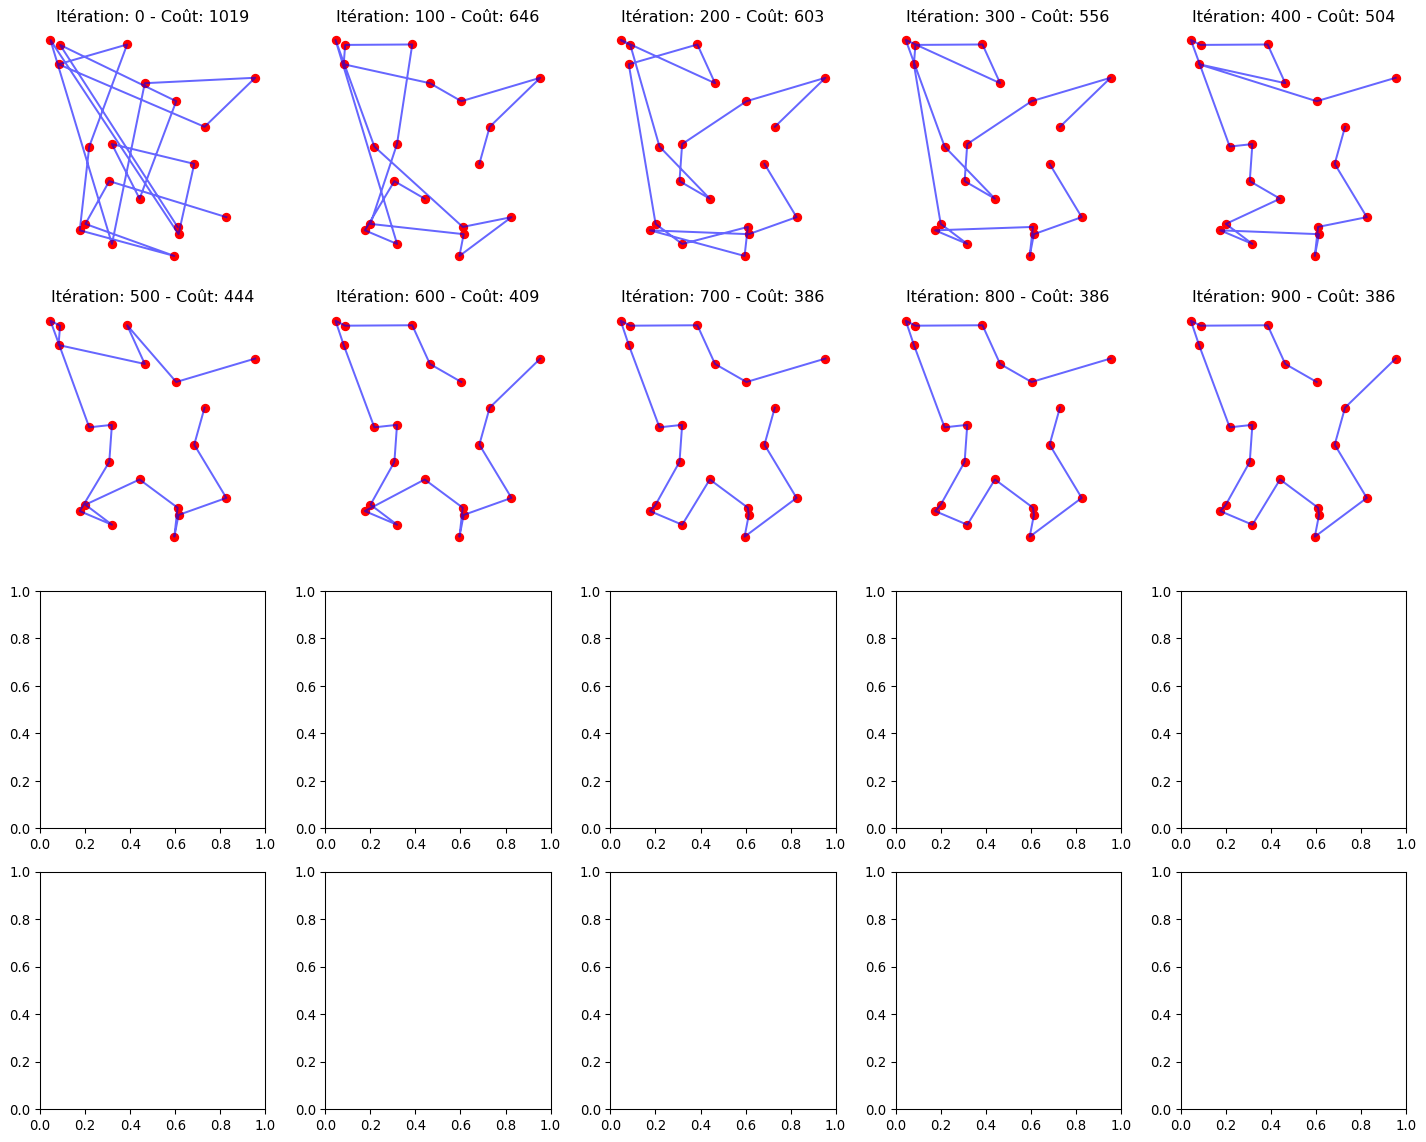

Lorsque j’ai initialement publié ces diapositives, la température
initiale sélectionnée de 1000 était excessivement élevée par rapport au
coût de la fonction objectif. En ajustant la température initiale à 15,
nous obtenons un équilibre plus efficace entre exploration et
exploitation.

En raison des instantanés pris toutes les 100 itérations, les
augmentations de coût ne sont pas visibles. Cela est illustré sur la
diapositive “Température et Coût”.

## Meilleur itinéraire

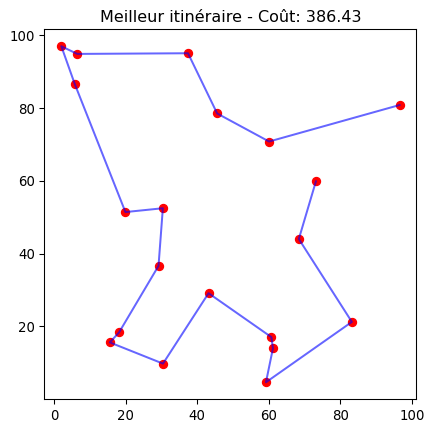

Nous avons identifié une **solution optimale**!

## Température et coût

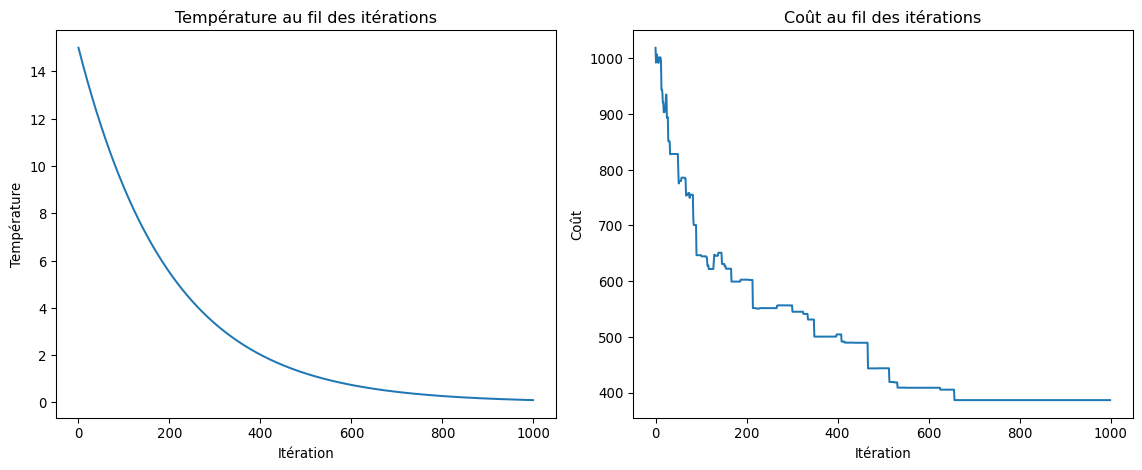

## Échange de voisins

-   **Description** : Sélectionner deux villes au hasard et échanger
    leurs positions.

-   **Avantages** : Simple et efficace pour explorer des solutions
    voisines.

-   **Inconvénients** : Le changement peut être trop minime, ce qui peut
    ralentir la convergence.

In [41]:
def get_neighbor_swap(route):
    a, b = np.random.randint(0, len(route), size=2)
    new_route = route.copy()
    new_route[a], new_route[b] = new_route[b], new_route[a]
    return new_route

## Trace d’exécution

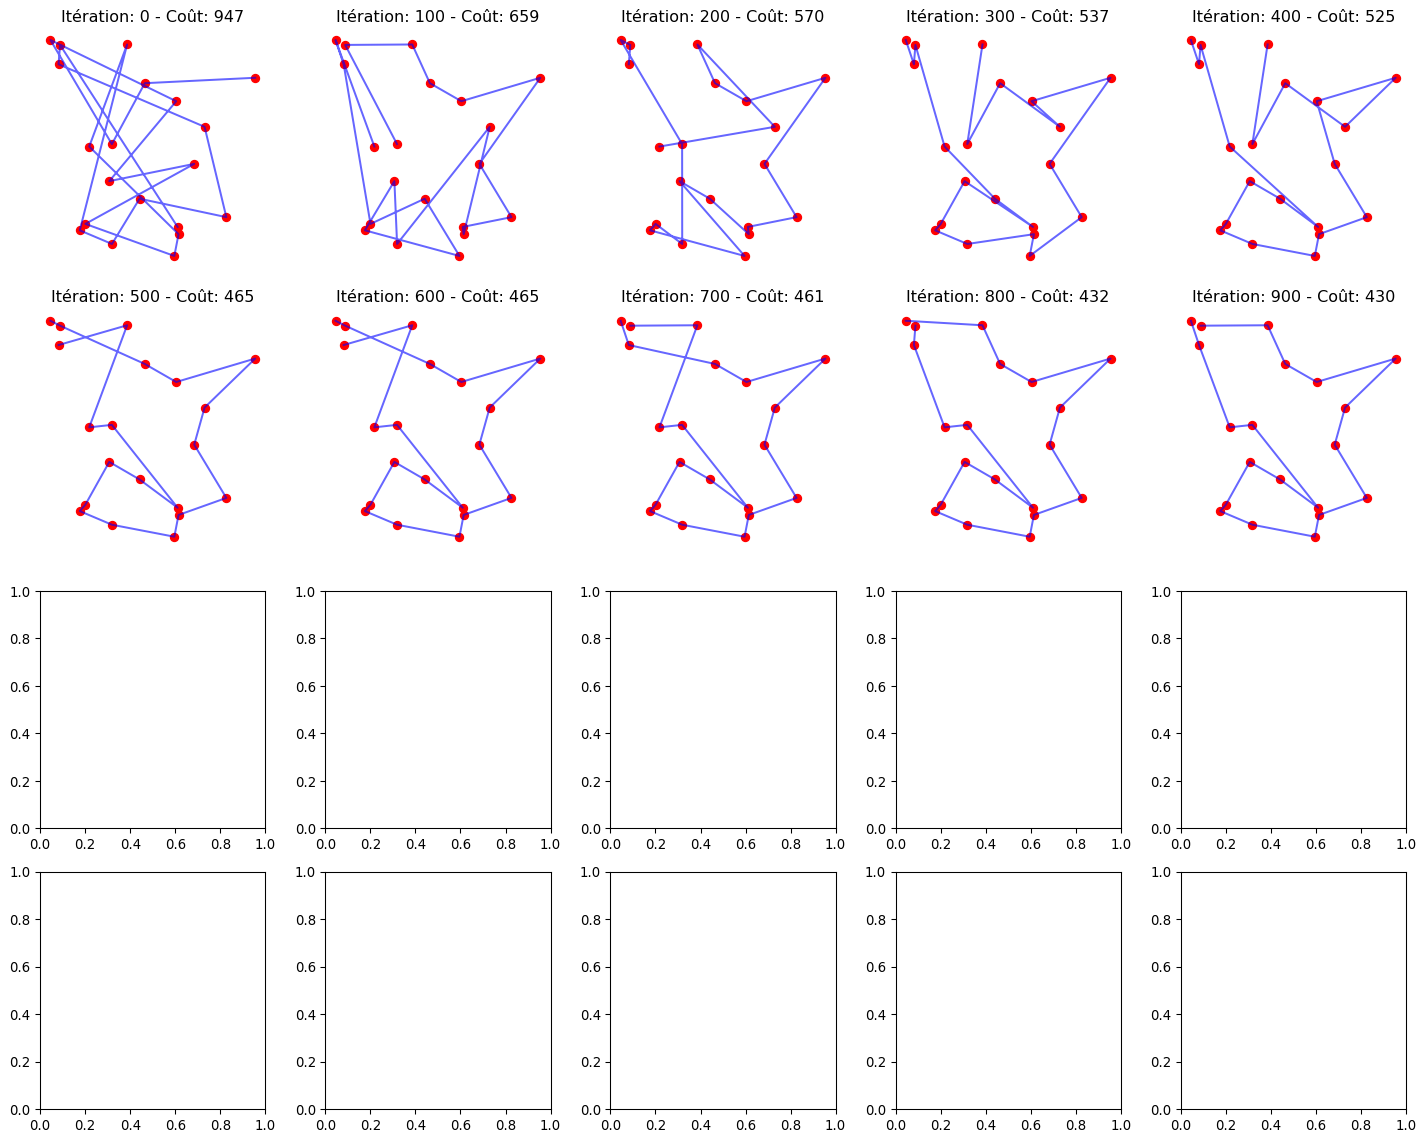

## Meilleur chemin

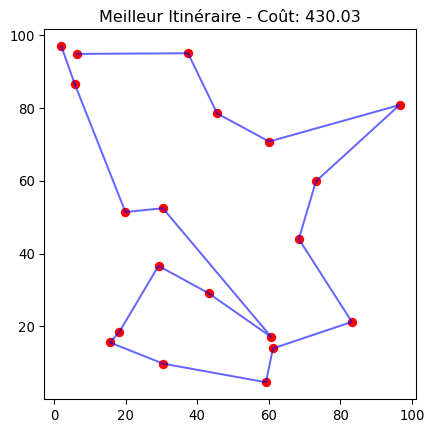

Dans ce cas précis et pour le problème donné, la **réversion de
segment** (coût = 386,43) s’est avérée plus efficace par rapport à
l’**échange de voisins** (coût = 430,03).

## Température et coût

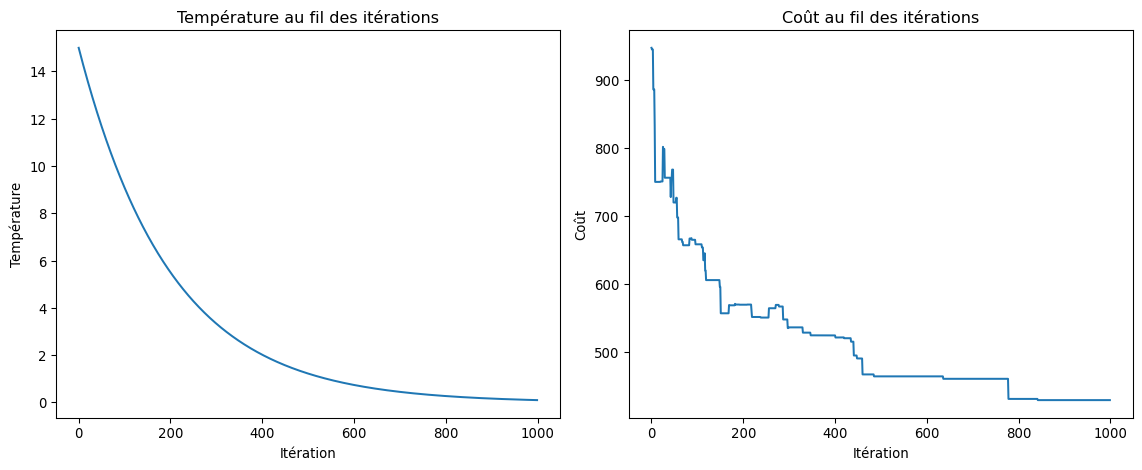

## Sélection d’une stratégie de voisinage

-   **Mouvements simples (échange, insertion)** : Efficaces pour
    l’exploration initiale ; risque d’être piégé dans des optima locaux.

-   **Mouvements complexes** : Améliorent la capacité à échapper aux
    optima locaux et accélèrent la convergence ; impliquent un coût
    computationnel plus élevé.

-   **Approches hybrides** : Intégrer diverses stratégies pour la
    génération de voisinage. Utiliser des mouvements simples au début,
    en passant à des mouvements complexes à mesure que la convergence
    progresse.

## Température initiale

**Influence** : Étant donné que la probabilité d’accepter un nouvel état
est donnée par $e^{-\frac{\Delta E}{T}}$, la sélection de la
**température initiale** est directement influencée par $\Delta E$ et
donc par la **valeur de la fonction objectif pour un état aléatoire**,
$f(s)$.

## Température initiale

-   **Problèmes exemple** : Considérons deux scénarios : le problème $a$
    avec $f(a) = 1,000$ et le problème $b$ avec $f(b) = 100$.

-   **Différence d’énergie** : Accepter un état 10 % pire entraîne des
    différences d’énergie de $\Delta E = 0.1 \cdot f(a) = 100$ pour le
    problème $a$ et $\Delta E = 0.1 \cdot f(b) = 10$ pour le problème
    $b$.

-   **Probabilité d’acceptation** : Pour accepter un tel état 60 % du
    temps, on fixe $e^{-\frac{\Delta E}{T}} = 0.6$. La résolution pour
    $T$ donne des températures initiales d’environ $T \approx 195.8$
    pour le problème $a$ et $T \approx 19.58$ pour le problème $b$.

## Température initiale

Une **approche populaire** consiste à définir la température initiale de
sorte qu’une **portion significative des mouvements (souvent autour de
60-80%) soit acceptée**.

Cela peut être réalisé en exécutant une phase préliminaire où la
température est ajustée jusqu’à ce que le ratio d’acceptation se
stabilise dans cette plage.

Ben-Ameur (2004) propose une méthodologie mathématique plus rigoureuse.

## Stratégies de refroidissement

Dans le cadre du **recuit simulé**, le refroidissement est essentiel
pour gérer la convergence de l’algorithme. Le calendrier de
refroidissement détermine le taux de diminution de la température,
influençant ainsi la capacité de l’algorithme à **échapper aux optima
locaux** et à **converger vers une solution quasi-optimale**.

Nourani et Andresen (1998) et Alex, Simon, et Samuel (2017)

## Refroidissement linéaire

-   **Description** : La température diminue linéairement à chaque
    itération.
-   **Formule** : $T = T_0 - \alpha \cdot k$
    -   $T_0$ : Température initiale
    -   $\alpha$ : Un décrément constant
    -   $k$ : Itération actuelle
-   **Avantages** : Simple à mettre en œuvre et à comprendre.
-   **Inconvénients** : Conduit souvent à une **convergence prématurée**
    car la température diminue trop rapidement.

In [45]:
temperature = initial_temp - alpha * iteration

## Refroidissement géométrique

-   **Description** : La température diminue de manière exponentielle à
    chaque itération.
-   **Formule** : $T = T_0 \cdot \alpha^k$
    -   $\alpha$ : Taux de refroidissement, généralement entre 0,8 et
        0,99
    -   $k$ : Itération actuelle
-   **Avantages** : Largement utilisé pour sa simplicité et son
    efficacité.
-   **Inconvénients** : Le choix de $\alpha$ est crucial ; s’il est trop
    petit, la température baisse trop rapidement, et s’il est trop
    grand, la convergence peut être lente.

In [46]:
temperature = initial_temp * (cooling_rate ** iteration)

## Refroidissement logarithmique

-   **Description** : La température diminue lentement selon une
    fonction logarithmique.
-   **Formule** : $T = \frac{\alpha \cdot T_0}{\log(1+k)}$
    -   $\alpha$ : Une constante de mise à l’échelle
    -   $k$ : Itération actuelle
-   **Avantages** : Offre un taux de refroidissement plus lent, utile
    pour les problèmes nécessitant une exploration approfondie de
    l’espace de solution.
-   **Inconvénients** : La convergence peut être très lente, nécessitant
    de nombreuses itérations.

In [47]:
temperature = alpha * initial_temp / (np.log(1 + iteration))

## Refroidissement inverse

-   **Description** : La température diminue selon une fonction inverse
    du numéro d’itération.
-   **Formule** : $T = \frac{T_0}{1+\alpha \cdot k}$
    -   $\alpha$ : Une constante de mise à l’échelle
    -   $k$ : Itération actuelle
-   **Avantages** : Permet un processus de refroidissement plus
    contrôlé, équilibrant exploration et exploitation.
-   **Inconvénients** : Peut nécessiter un ajustement minutieux de
    $\alpha$ pour être efficace.

In [48]:
temperature = initial_temp / (1 + alpha * iteration)

## Refroidissement adaptatif

-   **Description** : Le calendrier de refroidissement est ajusté
    dynamiquement en fonction des performances de l’algorithme.
-   **Stratégie** : Si l’algorithme ne progresse pas de manière
    significative, le taux de refroidissement peut être ralenti.
    Inversement, si le progrès est régulier, le taux de refroidissement
    peut être accéléré.
-   **Avantages** : Plus flexible et peut s’adapter aux caractéristiques
    du problème.
-   **Inconvénients** : Plus complexe à mettre en œuvre et nécessite une
    conception minutieuse pour éviter l’instabilité.

In [49]:
if no_significant_change_in_cost:
    temperature *= 0.99 # Ralentir le refroidissement
else:
    temperature *= 0.95 # Accélérer le refroidissement

## Stratégies de refroidissement

/var/folders/gh/zd7z03rs5dj7q_df5gz5jlmh0000gp/T/ipykernel_5899/3168696687.py:14: RuntimeWarning:

divide by zero encountered in scalar divide


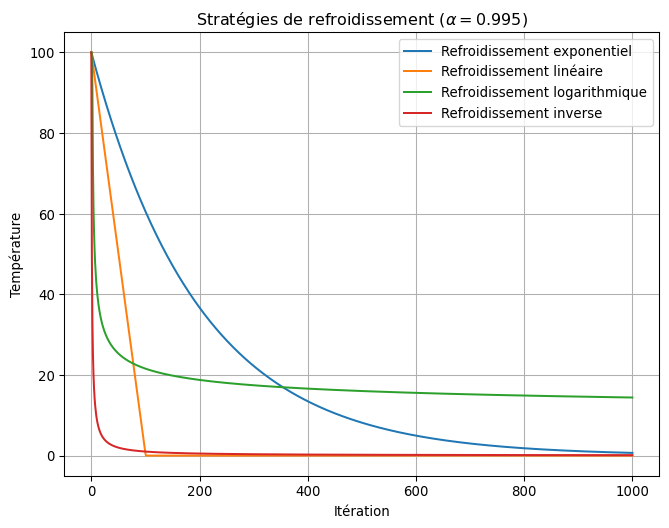

**Voir aussi** : [Effective Simulated Annealing with
Python](https://nathanrooy.github.io/posts/2020-05-14/simulated-annealing-with-python/)
par Nathan A. Rooy, 2024-11-05.

## Choisir la bonne stratégie

-   **Spécifique au problème** : Le choix du calendrier de
    refroidissement dépend souvent des caractéristiques du problème à
    résoudre. Certains problèmes bénéficient d’un taux de
    refroidissement plus lent, tandis que d’autres peuvent nécessiter
    une convergence plus rapide.

-   **Expérimentation** : Il est courant d’expérimenter différentes
    stratégies et paramètres pour trouver le meilleur équilibre entre
    exploration (recherche large) et exploitation (affinement des
    meilleures solutions actuelles).

## Conclusion

Après l’application du **recuit simulé**, une méthode de **recherche
locale** comme la **montée de colline** peut être utilisée pour
**affiner la solution**.

. . .

Le **recuit simulé** est efficace pour explorer l’espace de solutions et
**éviter les minima locaux**, tandis que la **recherche locale** se
concentre sur l’**exploration des solutions voisines de celle obtenue**.

## Visualisation du recuit simulé

<https://youtu.be/NPE3zncXA5s?si=Z9rk2Kt_5pN8ChlA>

**Attribution:**
[ComputationalScientist](https://www.youtube.com/@computationalscientist6368),
publié le 06-01-2018.

# Prologue

## Résumé

-   Les algorithmes de recherche locale se concentrent sur la recherche
    d’états objectifs en se déplaçant entre des états voisins sans
    suivre les chemins.
-   L’algorithme de montée de colline recherche le voisin de plus grande
    valeur mais peut se retrouver coincé dans des maxima locaux ou des
    plateaux.
-   Une représentation efficace de l’état, comme l’utilisation de
    permutations dans le problème des 8-Reines, évite les placements
    illégaux et améliore les performances.
-   Le recuit simulé permet des déplacements occasionnels vers le haut
    pour échapper aux optima locaux, contrôlés par un paramètre de
    température décroissant.
-   La probabilité d’acceptation dans le recuit simulé diminue à mesure
    que la température baisse et que la différence d’énergie augmente.
-   Le recuit simulé résout efficacement des problèmes complexes comme
    le problème du voyageur de commerce en explorant l’espace des
    solutions de manière probabiliste.

## Lectures complémentaires

![](https://media.springernature.com/full/springer-static/cover-hires/book/978-3-319-91086-4?as=webp.png)

“La méthodologie globale du recuit simulé \[simulated annealing\] est
ensuite déployée en détail sur une application réelle : un **problème de
planification de trajectoire aérienne à grande échelle impliquant près
de 30 000 vols** à l’échelle continentale européenne.”

(Gendreau et Potvin 2019, chap. 1)

Gendreau et Potvin (2019), [accès via Springer
Link](https://link.springer.com/book/10.1007/978-3-319-91086-4).

Saviez-vous que vous pouvez accéder gratuitement à l’ensemble de la
collection de livres de Springer ? En utilisant un appareil connecté à
une adresse IP de l’uOttawa et en visitant [Springer
Link](https://link.springer.com), vous avez la possibilité de
télécharger des livres en format PDF ou EPUB.

Le livre est co-édité par [Jean-Yves
Potvin](https://recherche.umontreal.ca/english/our-researchers/professors-directory/researcher/is/in14464/)
et [Michel
Gendreau](https://www.polymtl.ca/expertises/en/gendreau-michel).
[Jean-Yves
Potvin](https://recherche.umontreal.ca/english/our-researchers/professors-directory/researcher/is/in14464/)
est professeur à l’Université de Montréal, tandis que [Michel
Gendreau](https://www.polymtl.ca/expertises/en/gendreau-michel) est
professeur à l’École Polytechnique de Montréal.

## Prochain cours

-   Nous discuterons des algorithmes basés sur la population.

## Références

Alex, Kwaku Peprah, Kojo Appiah Simon, et Kwame Amponsah Samuel. 2017.
« An Optimal Cooling Schedule Using a Simulated Annealing Based
Approach ». *Applied Mathematics* 08 (08): 1195‑1210.
<https://doi.org/10.4236/am.2017.88090>.

Bellman, Richard. 1962. « Dynamic Programming Treatment of the
Travelling Salesman Problem ». *Journal of the ACM (JACM)* 9 (1): 61‑63.
<https://doi.org/10.1145/321105.321111>.

Ben-Ameur, Walid. 2004. « Computing the Initial Temperature of Simulated
Annealing ». *Computational Optimization and Applications* 29 (3):
369‑85. <https://doi.org/10.1023/b:coap.0000044187.23143.bd>.

Gendreau, M., et J. Y. Potvin. 2019. *Handbook of Metaheuristics*.
International Series in Operations Research & Management Science.
Springer International Publishing.
<https://books.google.com.ag/books?id=RbfFwQEACAAJ>.

Held, Michael, et Richard M. Karp. 1962. « A Dynamic Programming
Approach to Sequencing Problems ». *Journal of the Society for
Industrial and Applied Mathematics* 10 (1): 196‑210.
<https://doi.org/10.1137/0110015>.

Nourani, Yaghout, et Bjarne Andresen. 1998. « A comparison of simulated
annealing cooling strategies ». *Journal of Physics A: Mathematical and
General* 31 (41): 8373.

Russell, Stuart, et Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4ᵉ éd. Pearson. <http://aima.cs.berkeley.edu/>.

## Prochain cours

-   Nous discuterons des algorithmes basés sur les populations.

## Références

Alex, Kwaku Peprah, Kojo Appiah Simon, et Kwame Amponsah Samuel. 2017.
« An Optimal Cooling Schedule Using a Simulated Annealing Based
Approach ». *Applied Mathematics* 08 (08): 1195‑1210.
<https://doi.org/10.4236/am.2017.88090>.

Bellman, Richard. 1962. « Dynamic Programming Treatment of the
Travelling Salesman Problem ». *Journal of the ACM (JACM)* 9 (1): 61‑63.
<https://doi.org/10.1145/321105.321111>.

Ben-Ameur, Walid. 2004. « Computing the Initial Temperature of Simulated
Annealing ». *Computational Optimization and Applications* 29 (3):
369‑85. <https://doi.org/10.1023/b:coap.0000044187.23143.bd>.

Gendreau, M., et J. Y. Potvin. 2019. *Handbook of Metaheuristics*.
International Series in Operations Research & Management Science.
Springer International Publishing.
<https://books.google.com.ag/books?id=RbfFwQEACAAJ>.

Held, Michael, et Richard M. Karp. 1962. « A Dynamic Programming
Approach to Sequencing Problems ». *Journal of the Society for
Industrial and Applied Mathematics* 10 (1): 196‑210.
<https://doi.org/10.1137/0110015>.

Nourani, Yaghout, et Bjarne Andresen. 1998. « A comparison of simulated
annealing cooling strategies ». *Journal of Physics A: Mathematical and
General* 31 (41): 8373.

Russell, Stuart, et Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4ᵉ éd. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

École de **science informatique** et de génie électrique (**SI**GE)

Université d’Ottawa